In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates

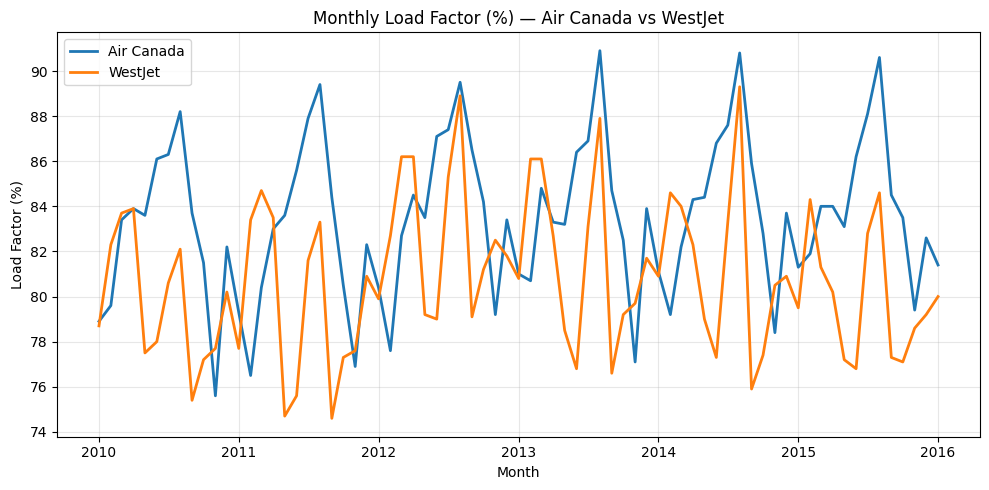

In [2]:
df_canonical = pd.read_csv("../data/airlines_data_canonical.csv")

df_plot = df_canonical.copy()

df_plot["REF_DATE"] = pd.to_datetime(df_plot["REF_DATE"])
df_plot = df_plot.sort_values(["REF_DATE", "Airlines"])


lf_wide = df_plot.pivot_table(
    index="REF_DATE",
    columns="Airlines",
    values="load_factor_pct",
    aggfunc="mean"  
).dropna(how="all")


plt.figure(figsize=(10,5))
plt.plot(lf_wide.index, lf_wide.get("Air Canada"), label="Air Canada", linewidth=2)
plt.plot(lf_wide.index, lf_wide.get("WestJet"),    label="WestJet",    linewidth=2)
plt.title("Monthly Load Factor (%) — Air Canada vs WestJet")
plt.xlabel("Month")
plt.ylabel("Load Factor (%)")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

#Air Canada usually filled more of its seats than WestJet (blue line often above orange). WestJet’s numbers jump around more — sometimes it did better than Air Canada, but other times much worse.

# Overall: Air Canada was more steady and efficient at filling planes, while WestJet was less predictable.

# Load Factor is highly seasonal for both airlines, with peaks in summer and troughs in winter. This reflects travel patterns, with more people flying during vacation periods.


/var/folders/gb/k6dlrgjj1sj86p2sks70tns00000gn/T/ipykernel_62243/3364297453.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([ac_fp, wj_fp], labels=["Air Canada","WestJet"])
/var/folders/gb/k6dlrgjj1sj86p2sks70tns00000gn/T/ipykernel_62243/3364297453.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([ac_fs, wj_fs], labels=["Air Canada","WestJet"])


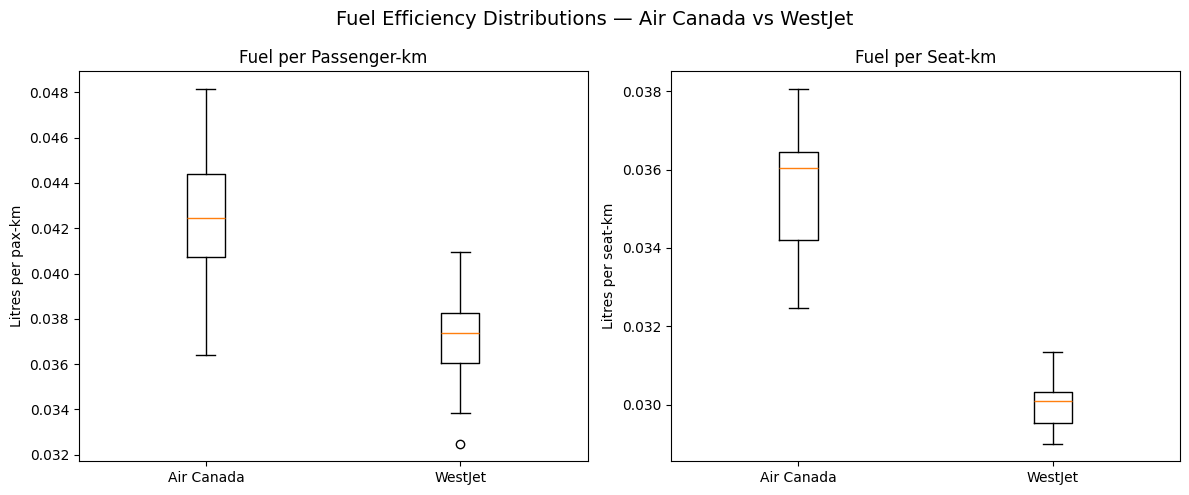

In [3]:
# Fuel per passenger-km (how much fuel is used per actual traveler carried per km).
# Fuel per seat-km (how much fuel per seat, regardless of whether it’s filled).

df_eff = df_canonical.copy()
df_eff["fuel_per_pax_km"] = df_eff["fuel_litres"] / df_eff["pax_km"]
df_eff["fuel_per_seat_km"] = df_eff["fuel_litres"] / df_eff["seat_km"]


ac_fp = df_eff[df_eff["Airlines"]=="Air Canada"]["fuel_per_pax_km"].dropna()
wj_fp = df_eff[df_eff["Airlines"]=="WestJet"]["fuel_per_pax_km"].dropna()

ac_fs = df_eff[df_eff["Airlines"]=="Air Canada"]["fuel_per_seat_km"].dropna()
wj_fs = df_eff[df_eff["Airlines"]=="WestJet"]["fuel_per_seat_km"].dropna()

# Box plots to compare distributions
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# 1st box plot: Fuel per Passenger-km (Left Side)
axes[0].boxplot([ac_fp, wj_fp], labels=["Air Canada","WestJet"])
axes[0].set_title("Fuel per Passenger-km")
axes[0].set_ylabel("Litres per pax-km")

# 2nd box plot: Fuel per Seat-km (Right Side)
axes[1].boxplot([ac_fs, wj_fs], labels=["Air Canada","WestJet"])
axes[1].set_title("Fuel per Seat-km")
axes[1].set_ylabel("Litres per seat-km")

plt.suptitle("Fuel Efficiency Distributions — Air Canada vs WestJet", fontsize=14)
plt.tight_layout()
plt.show()


# Air Canada has a higher median value and a wider spread. That means it generally uses more fuel per passenger-km and has more variability in efficiency. WestJet has lower values and less spread, suggesting it’s more efficient and more consistent when it comes to passengers carried.

# WestJet is more fuel-efficient than Air Canada, both per passenger and per seat. Air Canada not only consumes more fuel per unit but also has less predictable efficiency (more variation).


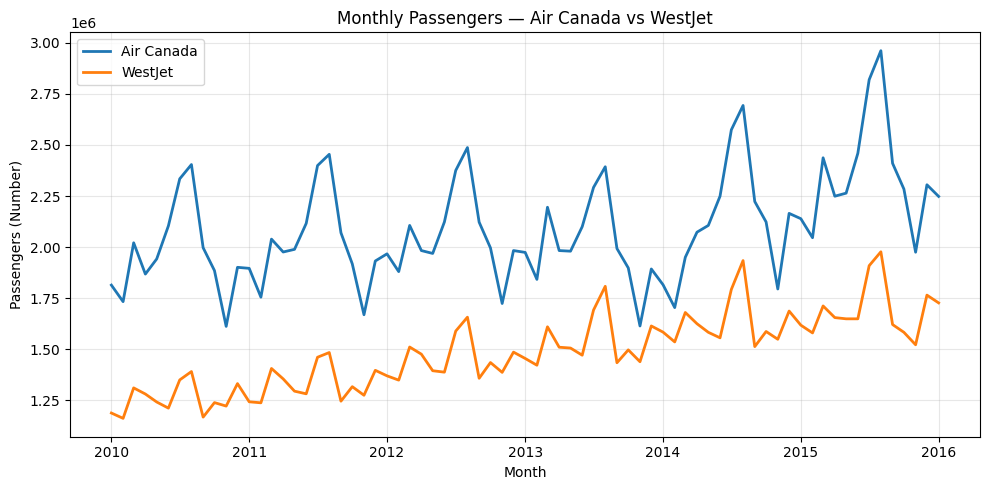

In [4]:
df_plot = df_canonical.copy()
df_plot["REF_DATE"] = pd.to_datetime(df_plot["REF_DATE"])
df_plot = df_plot.sort_values(["REF_DATE","Airlines"])

passengers_wide = df_plot.pivot_table(
    index="REF_DATE",
    columns="Airlines",
    values="passengers",
    aggfunc="mean"
).sort_index()

plt.figure(figsize=(10,5))
plt.plot(passengers_wide.index, passengers_wide.get("Air Canada"), label="Air Canada", linewidth=2)
plt.plot(passengers_wide.index, passengers_wide.get("WestJet"), label="WestJet", linewidth=2)

plt.title("Monthly Passengers — Air Canada vs WestJet")
plt.xlabel("Month")
plt.ylabel("Passengers (Number)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# Air Canada carries far more passengers overall, reflecting its larger international network. Both airlines show clear seasonality, with peaks in summer months and in late December, aligning with vacation travel patterns (new year holidays).

# Trends help explain fuel patterns — Air Canada’s scale drives much higher absolute fuel use, but efficiency per passenger is the real differentiator.

In [5]:
df_canonical.head()

,REF_DATE,Airlines,passengers,pax_km,seat_km,load_factor_pct,fuel_litres,hours_flown,cargo_kg,cargo_tkm
0,2010-01-01,Air Canada,1814000.0,5.781705e+09,7.327456e+09,78.9,265571000.0,65000.0,17969000.0,112798000.0
1,2010-01-01,WestJet,1188000.0,1.998100e+09,2.538280e+09,78.7,78197000.0,30000.0,343000.0,579000.0
2,2010-02-01,Air Canada,1733000.0,5.352969e+09,6.727937e+09,79.6,245341000.0,60000.0,18241000.0,114049000.0
3,2010-02-01,WestJet,1162000.0,1.932838e+09,2.348658e+09,82.3,72572000.0,28000.0,332000.0,555000.0
4,2010-03-01,Air Canada,2021000.0,6.311269e+09,7.564472e+09,83.4,273473000.0,66000.0,22418000.0,139184000.0


In [6]:
df_canonical["cargo_share_pct"] = (
    df_canonical["cargo_tkm"] / (df_canonical["pax_km"] + df_canonical["cargo_tkm"])
) * 100


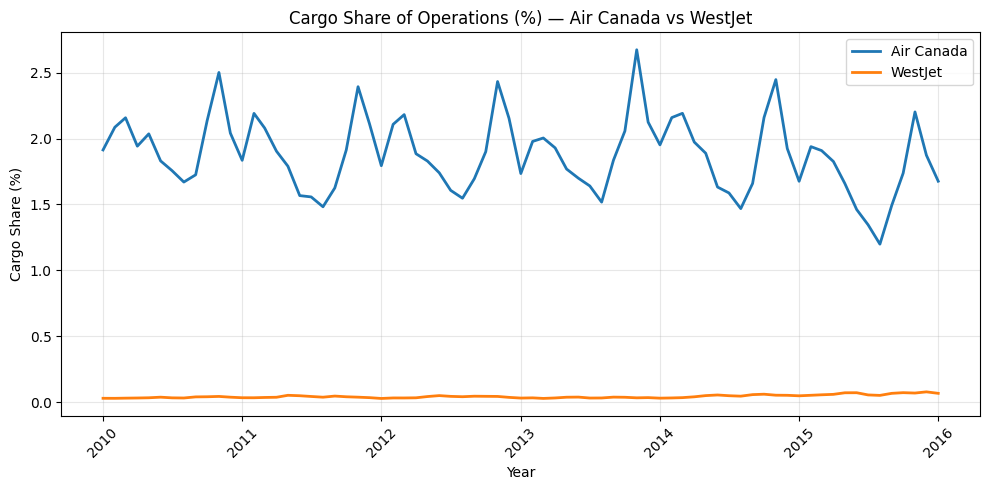

In [7]:
import matplotlib.dates as mdates


df_plot = df_canonical.copy()
df_plot["REF_DATE"] = pd.to_datetime(df_plot["REF_DATE"], errors="coerce")
df_plot = df_plot.sort_values(["REF_DATE","Airlines"])


plt.figure(figsize=(10,5))
for airline in ["Air Canada","WestJet"]:
    sub = df_plot[df_plot["Airlines"]==airline]
    plt.plot(sub["REF_DATE"], sub["cargo_share_pct"], label=airline, linewidth=2)

plt.title("Cargo Share of Operations (%) — Air Canada vs WestJet")
plt.xlabel("Year")
plt.ylabel("Cargo Share (%)")
plt.legend()
plt.grid(alpha=0.3)


ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())        
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.xticks(rotation=45)                                    

plt.tight_layout()
plt.show()


# Air Canada leverages cargo as a meaningful part of its operations, while WestJet is almost entirely passenger-driven.This explains part of Air Canada’s higher fuel burn — its planes carry not just passengers but also freight, which is a revenue advantage.

/var/folders/gb/k6dlrgjj1sj86p2sks70tns00000gn/T/ipykernel_62243/2455562849.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ac_ph, wj_ph], labels=["Air Canada","WestJet"])


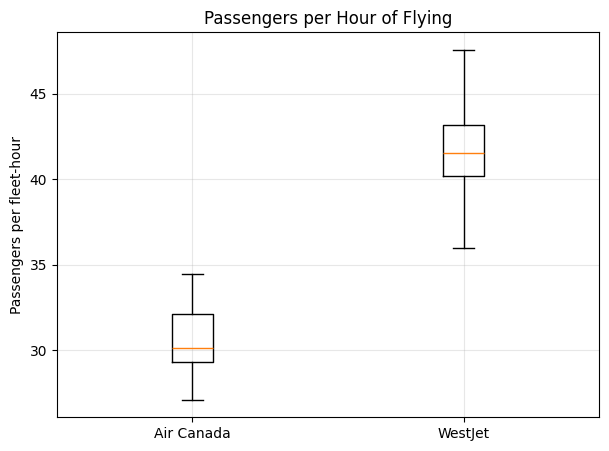

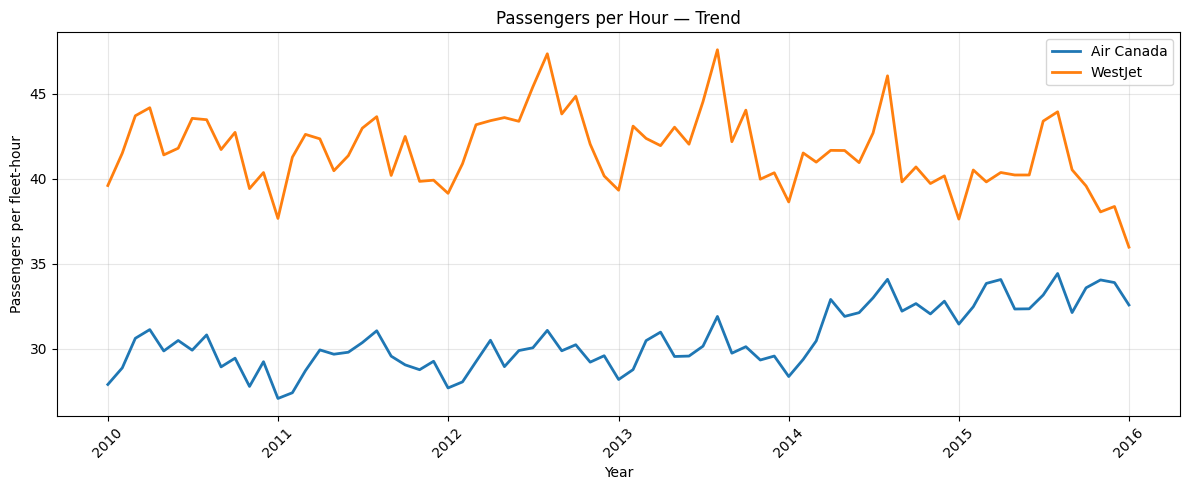

In [8]:
# How many passengers does each airline move per hour of flying?

df_plot["pax_per_hour"] = df_plot["passengers"] / df_plot["hours_flown"]


ac_ph = df_plot[df_plot["Airlines"]=="Air Canada"]["pax_per_hour"].dropna()
wj_ph = df_plot[df_plot["Airlines"]=="WestJet"]["pax_per_hour"].dropna()

plt.figure(figsize=(7,5))
plt.boxplot([ac_ph, wj_ph], labels=["Air Canada","WestJet"])
plt.title("Passengers per Hour of Flying")
plt.ylabel("Passengers per fleet-hour")
plt.grid(alpha=0.3)
plt.show()


plt.figure(figsize=(12,5))
for airline in ["Air Canada","WestJet"]:
    subset = df_plot[df_plot["Airlines"]==airline]
    plt.plot(subset["REF_DATE"], subset["pax_per_hour"], label=airline, linewidth=2)

plt.title("Passengers per Hour — Trend")
plt.xlabel("Year")
plt.ylabel("Passengers per fleet-hour")
plt.legend()
plt.grid(alpha=0.3)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())            
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))    
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


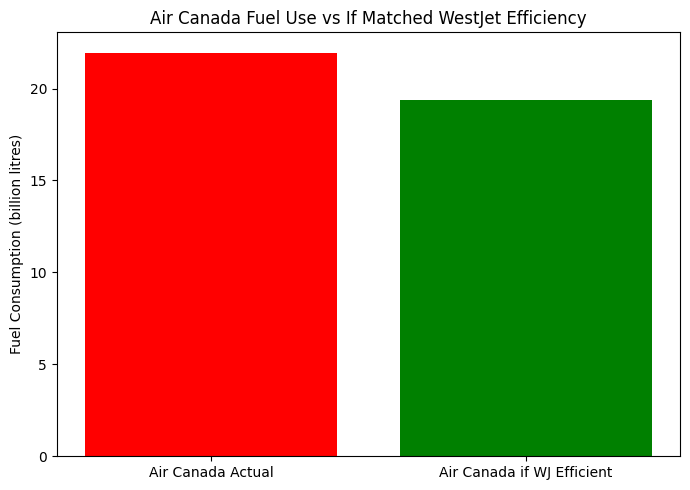

Fuel savings: 2600.54 million litres
Money savings: $ 1430.29 million CAD


In [10]:
# Interesting Insight: What if Air Canada could somehow match WestJet's efficiency? I understand that it has international flights and cargo, but even a partial improvement could yield big fuel savings given its scale. Let's see how much money Air can save if it improves its efficiency to match WestJet's current levels.

# We already calculated this in statistica_analysis.py, but here we will visualize it.


ac_eff = df_eff.loc[df_eff["Airlines"]=="Air Canada", "fuel_per_pax_km"].mean()
wj_eff = df_eff.loc[df_eff["Airlines"]=="WestJet",   "fuel_per_pax_km"].mean()

ac_total_fuel  = df_canonical[df_canonical["Airlines"]=="Air Canada"]["fuel_litres"].sum()
ac_total_paxkm = df_canonical[df_canonical["Airlines"]=="Air Canada"]["pax_km"].sum()

# Expected fuel if AC matched WestJet efficiency
ac_fuel_if_wj = ac_total_paxkm * wj_eff


fuel_savings = ac_total_fuel - ac_fuel_if_wj
fuel_price   = 0.55
money_savings = fuel_savings * fuel_price

plt.figure(figsize=(7,5))
plt.bar(["Air Canada Actual","Air Canada if WJ Efficient"],
        [ac_total_fuel/1e9, ac_fuel_if_wj/1e9],
        color=["red","green"])

plt.ylabel("Fuel Consumption (billion litres)")
plt.title("Air Canada Fuel Use vs If Matched WestJet Efficiency")
plt.tight_layout()
plt.show()

print("Fuel savings:", round(fuel_savings/1e6,2), "million litres")
print("Money savings: $", round(money_savings/1e6,2), "million CAD")



Million Dollar Question: AirCanada is less efficient than WestJet?

Analysis 1: Air Canada carries significant belly cargo, longer distances, bigger aircraft, more takeoff cycles hence naturally higher fuel. Freight adds weight and therefore more fuel. So yes, Air Canada should consume more fuel overall.

Analysis 2: When we ran regression on pax_km, hours_flown, even after controlling for those, the Air Canada dummy was still +50–70M litres which means AC burns more fuel per unit of activity, not just because of scale.

Analysis 3: Cargo does justify some extra fuel. But when we normalize fuel by pax-km or seat-km, AC is still consistently higher than WJ. That means: it’s not just “cargo explains everything.”

It’s true Air Canada’s larger international footprint and higher cargo share naturally increase fuel burn compared to WestJet. However, after statistically controlling for distance flown, hours in the air, and capacity, Air Canada still consumes 50–70M more litres than WestJet for equivalent activity. This indicates a structural efficiency gap rather than just scale differences. Cargo explains part of it, but not all — suggesting that aircraft technology, route design, and operational practices contribute to Air Canada’s higher per-unit fuel use